In [2]:
## Import Libraries

import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge, RidgeCV
from sklearn.linear_model import Lasso, LassoCV
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import cross_val_score

## Avoid some version change warnings. Optional step
import warnings
warnings.filterwarnings('ignore', message='numpy.dtype size changed')

In [3]:
## Load the Diabetes dataset

# Load the diabetes dataset from sklearn

diabetes = datasets.load_diabetes()

In [4]:
# Description
print(diabetes.DESCR) 

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [5]:
X = pd.DataFrame(diabetes.data, columns=diabetes.feature_names)

In [6]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [7]:
y = diabetes.target

Create a Base Model

In [8]:
# Create Model
model = LinearRegression()

In [9]:
# Fit Model
model.fit(X, y)

LinearRegression()

In [10]:
# Score
model.score(X, y)

0.5177484222203498

In [11]:
def view_coeff(X, model):
    model_coefs = pd.DataFrame({'variable': X.columns, # Get the column names
                                'coef': model.coef_, # Get the coefficients
                                'abs_coef': np.abs(model.coef_)}) # Absolute value of the coefficient. abs() is a built-in function in Python
    model_coefs.sort_values('abs_coef', inplace=True, ascending=False) # Sort by absolute value of coefficient
    sns.barplot(x = 'variable', y = 'coef', data = model_coefs) # Create a barplot

In [12]:
X.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [13]:
# Check coefficients
model.coef_

array([ -10.0098663 , -239.81564367,  519.84592005,  324.3846455 ,
       -792.17563855,  476.73902101,  101.04326794,  177.06323767,
        751.27369956,   67.62669218])

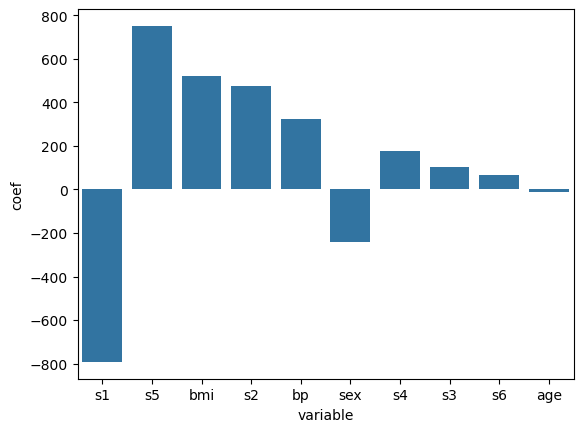

In [14]:
# Plot coefficients
view_coeff(X, model)

Calculate Ridge Regression Model

In [15]:
ridge_model = Ridge()
ridge_model.fit(X, y)

Ridge()

In [16]:
# Get the coefficients of the ridge regression model
ridge_model.coef_ 

array([  29.46611189,  -83.15427636,  306.35268015,  201.62773437,
          5.90961437,  -29.51549508, -152.04028006,  117.3117316 ,
        262.94429001,  111.87895644])

In [17]:
# Calculate the mean squared error between the ridge regression model and linear regression cofficients
mean_squared_error(model.coef_, ridge_model.coef_)

128802.8865422981

In [18]:
# Calculate the ridge regression model
ridge_model = Ridge()
# keep track of the intermediate results for coefficients and errors
coefs = []
errors = []

# Create a range of alphas to calculate
ridge_alphas = np.logspace(-6, 6, 200)

# Train the model with different regularisation strengths
for i in ridge_alphas:
    ridge_model.set_params(alpha = i) # set the alpha value so that the model will be regularised
    ridge_model.fit(X, y)
    coefs.append(ridge_model.coef_) # store the coefficients
    errors.append(mean_squared_error(model.coef_, ridge_model.coef_)) # store the mean squared error

In [19]:
len(coefs) # Check the length of the coefficients

200

Visual Representation of coefficient of the rideg model

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


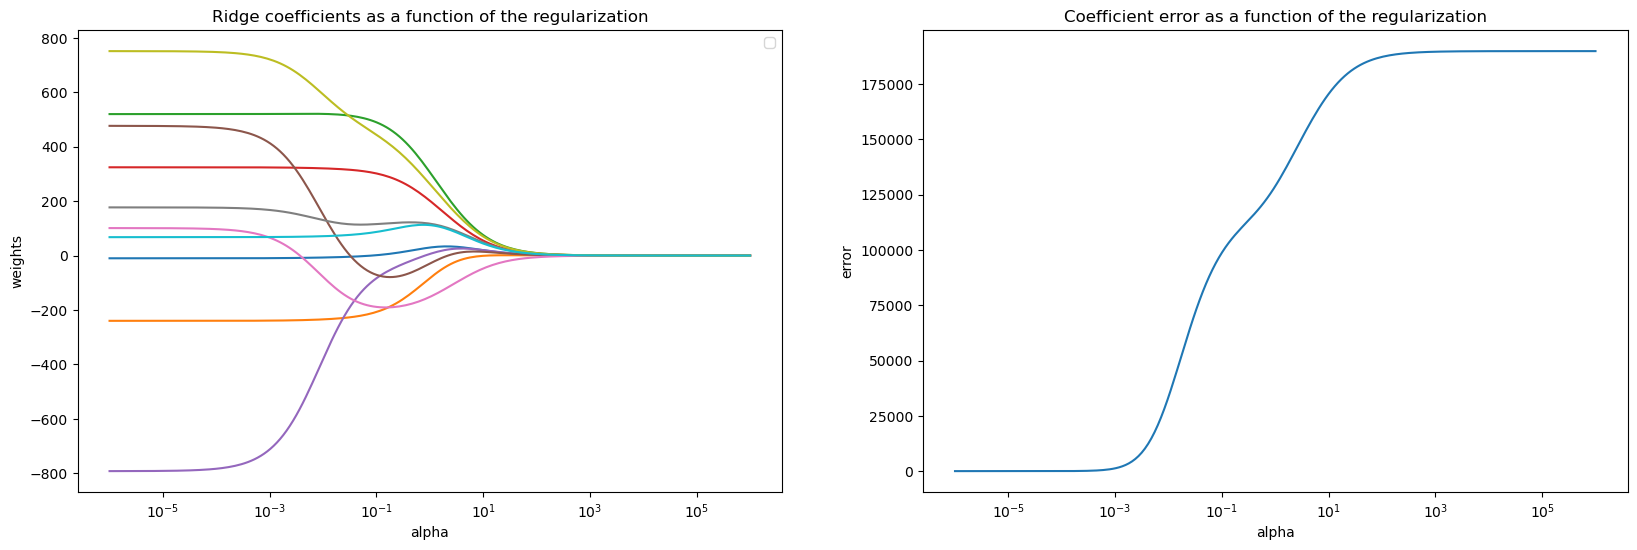

In [20]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(ridge_alphas, coefs)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.legend()

plt.subplot(122)
ax = plt.gca()
ax.plot(ridge_alphas, errors)
ax.set_xscale('log')
plt.xlabel('alpha')
plt.ylabel('error')
plt.title('Coefficient error as a function of the regularization')
plt.axis('tight')

plt.show()

Find the optimal value for ridge regression alpha using RidgeCV

In [21]:
optimal_ridge = RidgeCV(alphas = ridge_alphas, cv = 10) # cv is the number of folds
optimal_ridge.fit(X, y)
print('Alpha:', optimal_ridge.alpha_)
print('Score:', optimal_ridge.score(X, y))

Alpha: 0.06669919663030115
Score: 0.5138352359035858


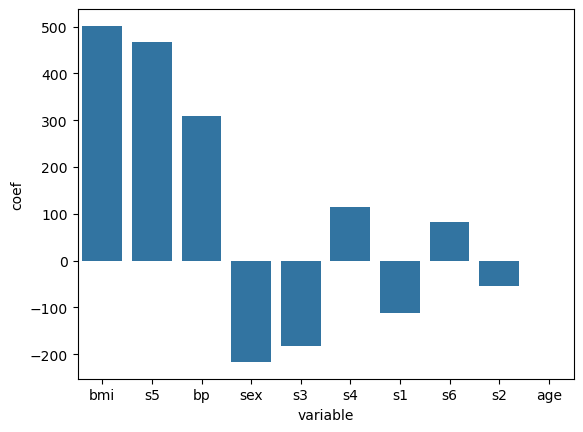

In [22]:
view_coeff(X, optimal_ridge)

In [23]:
optimal_ridge.coef_

array([  -1.26474186, -216.39460047,  501.54971795,  308.13254162,
       -112.18452928,  -54.47177855, -182.30247501,  114.03129811,
        466.75421801,   81.94402103])

Calculate Lasso Regression Model

In [24]:
from sklearn.linear_model import Lasso

# Create a model object to hold the model parameters
lasso_model = Lasso()
# keep track of the intermediate results for coefficients and errors so that we can plot them later
coefs = []
errors = []

# Create a range of alphas to calculate
lasso_alphas = np.logspace(-6, 6, 200)
# Train the model with different regularization strenghts
for a in lasso_alphas:
    lasso_model.set_params(alpha = a) # set the alpha value so that the model will be regularized
    lasso_model.fit(X, y)
    coefs.append(lasso_model.coef_) # store the coefficients
    errors.append(mean_squared_error(model.coef_, lasso_model.coef_)) # store the mean squared error
len(coefs)

200

Visual Representation of Coefficient for Lasso Model

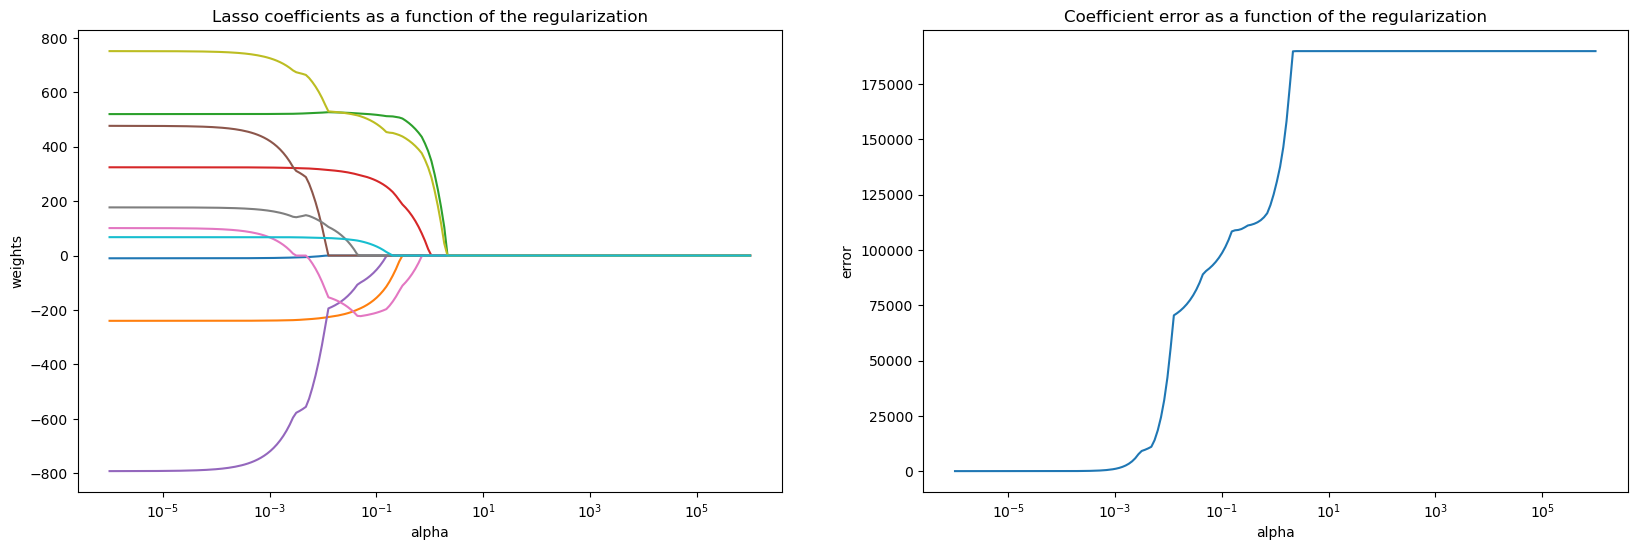

In [25]:
# Display results
plt.figure(figsize = (20, 6))

plt.subplot(121)
ax = plt.gca()
ax.plot(lasso_alphas, coefs)
ax.set_xscale('log') # set the x scale to log
plt.xlabel('alpha') # set the x label
plt.ylabel('weights') #sset the ylabel
plt.title('Lasso coefficients as a function of the regularization') # set the title
plt.axis('tight') # set the axis

plt.subplot(122)
ax = plt.gca() # get the axis
ax.plot(lasso_alphas, errors) # plot the errors
ax.set_xscale('log') # set the x scale to log
plt.xlabel('alpha') # set the x label
plt.ylabel('error') # set the y label
plt.title('Coefficient error as a function of the regularization') # set the title
plt.axis('tight') # set the axis

plt.show()

Find the optimal value for lasso regression alpha using LassoCV

In [26]:
# Find the optimal lasso model using lassoCV
from sklearn.linear_model import LassoCV

optimal_lasso = RidgeCV(alphas = lasso_alphas, cv = 10) # cv is the number of folds
optimal_lasso.fit(X, y)
print('Alpha:', optimal_lasso.alpha_)
print('Score:', optimal_lasso.score(X, y))

Alpha: 0.06669919663030115
Score: 0.5138352359035858


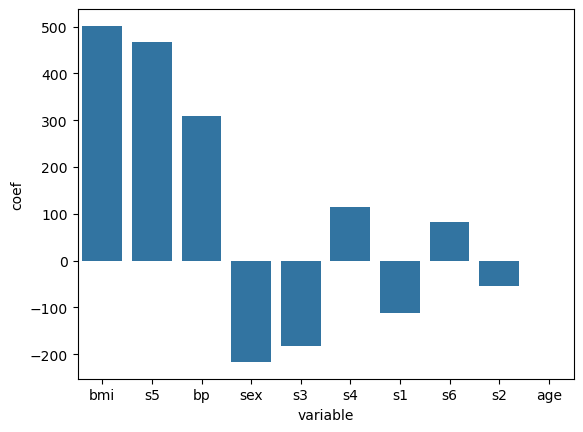

In [27]:
view_coeff(X, optimal_lasso)

In [28]:
optimal_lasso.coef_

array([  -1.26474186, -216.39460047,  501.54971795,  308.13254162,
       -112.18452928,  -54.47177855, -182.30247501,  114.03129811,
        466.75421801,   81.94402103])

Compare the residuals for the Ridge and Lasso visually

In [33]:
# Bluid the ridge and lasso model using optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
opt_ridge_model = Ridge(alpha = optimal_ridge.alpha_)
opt_ridge_model.fit(X, y)

Ridge(alpha=0.06669919663030115)

In [32]:
# Build the lasso model using optimal alpha
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
opt_lasso_model = Lasso(alpha = optimal_lasso.alpha_)
opt_lasso_model.fit(X, y) 

Lasso(alpha=0.06669919663030115)

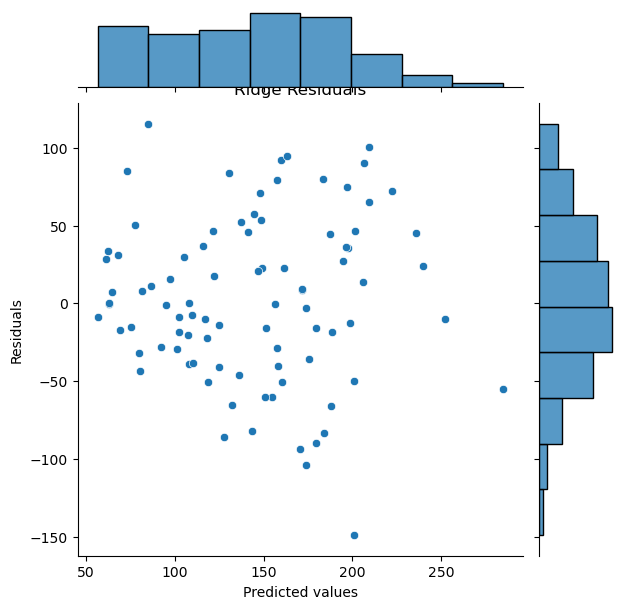

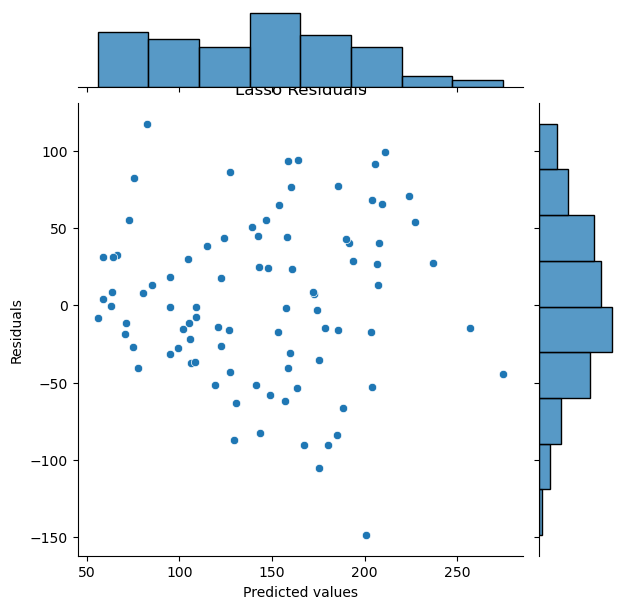

In [35]:
import seaborn as sns

# Assuming X_test and y_test are your test data and labels

# Predict with Ridge and Lasso models
ridge_preds = opt_ridge_model.predict(X_test)
lasso_preds = opt_lasso_model.predict(X_test)

# Calculate residuals
ridge_residuals = y_test - ridge_preds
lasso_residuals = y_test - lasso_preds

# Create joint plots
sns.jointplot(x=ridge_preds, y=ridge_residuals, kind='scatter').set_axis_labels("Predicted values", "Residuals")
plt.title('Ridge Residuals')

sns.jointplot(x=lasso_preds, y=lasso_residuals, kind='scatter').set_axis_labels("Predicted values", "Residuals")
plt.title('Lasso Residuals')

plt.show()